In [89]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import os

# On souhaite pouvoir prévoir le nombre de décès en France
# importing data
path=os.getcwd()
os.listdir(path)

['.ipynb_checkpoints',
 'Data_Proj.csv',
 'Data_Proj2.csv',
 'donnees-hospitalieres-classe-age-covid19-2021-06-08-19h09.csv',
 'Untitled.ipynb']

In [90]:
file=path+"\\"+os.listdir(path)[2]

In [91]:
timeFranceCovid=pd.read_csv(file,sep=";")
timeFranceCovid.head()

,jour,J+,hosp,rea,rad,dc
0,18/03/2020,0,5877,1535,1622,434
1,19/03/2020,1,8821,2229,2567,738
2,20/03/2020,2,10337,2578,3149,894
3,21/03/2020,3,12221,3029,3768,1116
4,22/03/2020,4,14356,3471,4378,1340


In [92]:
print(timeFranceCovid.describe())
print("\n ________________________")
# Cleaning des NaN s'il y en a
masque=timeFranceCovid.isnull()
timeFranceCovid=timeFranceCovid[~masque]
print(timeFranceCovid.describe())

               J+          hosp          rea            rad             dc
count  448.000000    448.000000    448.00000     448.000000     448.000000
mean   223.500000  38408.162946   5697.68750  317127.613839   74603.359375
std    129.470717  18936.028997   3664.71879  211418.042432   47933.470848
min      0.000000   5877.000000    685.00000    1622.000000     434.000000
25%    111.750000  17337.750000   2111.75000  155276.000000   38812.000000
50%    223.500000  48443.000000   5687.00000  225900.000000   48420.500000
75%    335.250000  53761.750000   8410.25000  487164.000000  116936.000000
max    447.000000  66677.000000  13970.00000  747614.000000  166968.000000

 ________________________
               J+          hosp          rea            rad             dc
count  448.000000    448.000000    448.00000     448.000000     448.000000
mean   223.500000  38408.162946   5697.68750  317127.613839   74603.359375
std    129.470717  18936.028997   3664.71879  211418.042432   47933.47084

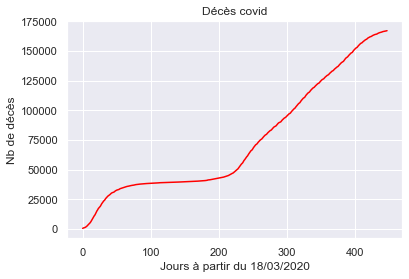

In [93]:
sns.set()
plt.plot(timeFranceCovid["J+"],timeFranceCovid["dc"],color='red')
plt.xlabel("Jours à partir du 18/03/2020")
plt.ylabel("Nb de décès")
plt.title("Décès covid")
plt.show()


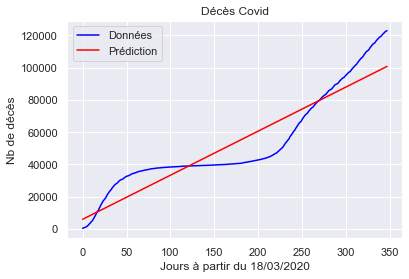

In [94]:
# Une régression semble être appropriée pour ce problème.
# Création du modèle
model=LinearRegression()

# Splitting du dataset en un training set et un testing set
x=timeFranceCovid["J+"].values.reshape(-1,1)
y=timeFranceCovid["dc"].values
xTrain=timeFranceCovid["J+"].values[:-100].reshape(-1,1)
yTrain=timeFranceCovid["dc"].values[:-100]
xTest=timeFranceCovid["J+"].values[-100:].reshape(-1,1)
yTest=timeFranceCovid["dc"].values[-100:]

#Entrainement du modèle simple
model.fit(xTrain,yTrain)

#prediction
yPredict=model.predict(xTrain)

sns.set()
plt.plot(xTrain,yTrain,color="blue",label="Données")
plt.plot(xTrain,yPredict,color='red',label="Prédiction")
plt.legend()
plt.xlabel("Jours à partir du 18/03/2020")
plt.ylabel("Nb de décès")
plt.title("Décès Covid")
plt.show()

In [95]:
r2_score(yTrain,yPredict)

0.8546052774945715

In [96]:
residuals=yTrain-yPredict

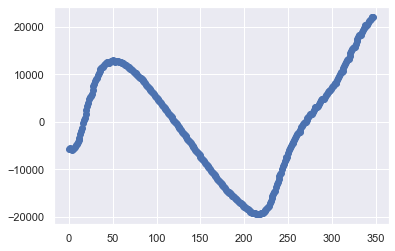

In [97]:
sns.set()
plt.scatter(xTrain,residuals)

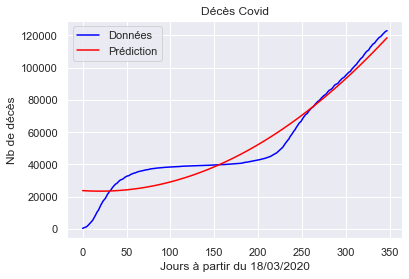

In [105]:
#Bof en linéaire
# Overfitting à degree=4
features=PolynomialFeatures(degree=2)
X_poly=features.fit_transform(xTrain)
modelPoly=LinearRegression()
modelPoly.fit(X_poly,yTrain)
yPredictPoly=modelPoly.predict(X_poly)

sns.set()
plt.plot(xTrain,yTrain,color="blue",label="Données")
plt.plot(xTrain,yPredictPoly,color='red',label="Prédiction")
plt.legend()
plt.xlabel("Jours à partir du 18/03/2020")
plt.ylabel("Nb de décès")
plt.title("Décès Covid")
plt.show()

In [106]:
r2_score(yTrain,yPredictPoly)

0.9275526484416211

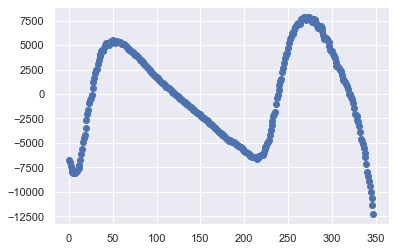

In [100]:
residualsPoly=yTrain-yPredictPoly
sns.set()
plt.scatter(xTrain,residualsPoly)
#C'est mieux!

In [107]:
timeFrame=[i for i in range(348,501)]


In [108]:
print(timeFrame)

[348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500]


In [109]:
import numpy as np
timeFrame=pd.DataFrame(np.array(timeFrame),columns=["J+"])

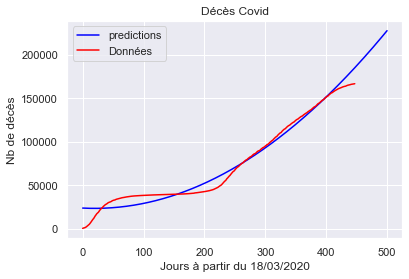

In [110]:
time=timeFrame["J+"].values.reshape(-1,1)
timePoly=features.fit_transform(time)
yPredict500=modelPoly.predict(timePoly)

newTime=np.append(xTrain,time)
newPredict=np.append(yPredictPoly,yPredict500)
sns.set()
plt.plot(newTime,newPredict,color="blue",label="predictions")
plt.plot(x,y,color="red",label="Données")
plt.legend()
plt.xlabel("Jours à partir du 18/03/2020")
plt.ylabel("Nb de décès")
plt.title("Décès Covid")
plt.show()

La prévision linéaire s'éloigne de la réalité en bout de modèle. Un autre modèle pourra être proposé